<a href="https://colab.research.google.com/github/TreeLiquid/Intro-to-ML/blob/main/Shigapov_4105_HW4_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import seaborn as sea
from matplotlib.colors import ListedColormap

In [29]:
from google.colab import drive
drive.mount('/content/drive')

#Obtain file data
cancer = '/content/drive/My Drive/Fall-2023/Intro-to-ML/Datasets/cancer.csv'
cancerData = pd.DataFrame(pd.read_csv(cancer))
cancerData.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [30]:
#Converting M/B to 1/0
varlist = ['diagnosis']

#Map Func (I am not converting furnishing status as the HW doesn't require me to)
def binary_map(x):
  return x.map({'M': 1, 'B': 0})

cancerData[varlist] = cancerData[varlist].apply(binary_map)
cancerData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [31]:
X = cancerData.iloc[:,2:32]
y = cancerData.iloc[:, 1].values

X = pd.DataFrame(X)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
#Scaling
scale = StandardScaler()
X_std = scale.fit_transform(X)

#Splitting
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size=0.8, test_size=0.2, random_state=0)

In [33]:
def featureReduction(x_train, x_test, K):
  pca = PCA(n_components = K)
  x_train_tran = pca.fit_transform(x_train)
  x_test_tran = pca.fit_transform(x_test)
  return x_train_tran, x_test_tran

In [34]:
#Value Arrays
high_acc = 0
accuracies = []
precision = []
recall = []
f1 = []

In [35]:
#Calculating Values
for K in range(1,31):
  xtrt, xtet = featureReduction(X_train, X_test, K)
  classifier = SVC(kernel= 'linear', C = 1E4)
  classifier.fit(xtrt, y_train)
  y_prediction = classifier.predict(xtet)

  #Fill Arrays
  accuracies.append(metrics.accuracy_score(y_test,y_prediction))
  precision.append(metrics.precision_score(y_test,y_prediction))
  recall.append(metrics.recall_score(y_test,y_prediction))
  f1.append(metrics.f1_score(y_test,y_prediction))

  #Get Best K
  if(metrics.accuracy_score(y_test,y_prediction) > high_acc):
    high_acc = metrics.accuracy_score(y_test,y_prediction)
    BestK = K

#Display Values @ best K
print("Best K Value" , BestK)
print("Accuracy" , high_acc)

Best K Value 12
Accuracy 0.9385964912280702


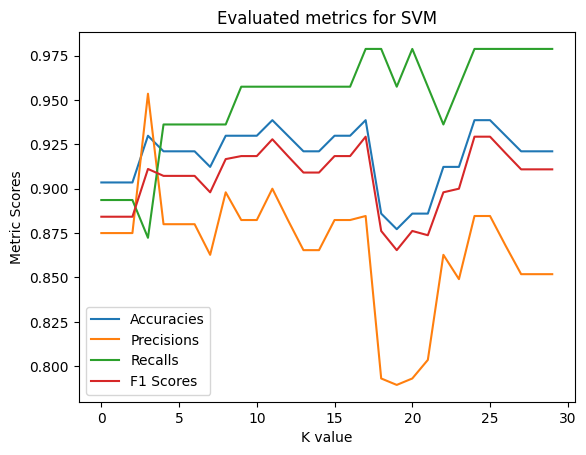

In [36]:
#Plot Arrays
plt.plot(accuracies, label="Accuracies")
plt.plot(precision, label="Precisions")
plt.plot(recall, label="Recalls")
plt.plot(f1, label="F1 Scores")
plt.xlabel("K value")
plt.ylabel("Metric Scores")
plt.legend()
plt.title("Evaluated metrics for SVM")
plt.show()

In [37]:
#Kernal Tricks
#Linear, Poly, RBF, Sigmoid, & Precomputed
K = 12
c = 1E4

xtrt, xtet = featureReduction(X_train, X_test, K)

#Linear
lin = SVC(kernel= 'linear', C= c)
lin.fit(xtrt, y_train)
lin_pred = lin.predict(xtet)
lin_acc = metrics.accuracy_score(y_test, lin_pred)
print(lin_acc)

#Poly
poly = SVC(kernel= 'poly', C= c)
poly.fit(xtrt, y_train)
poly_pred = poly.predict(xtet)
poly_acc = metrics.accuracy_score(y_test, poly_pred)
print(poly_acc)

#RBF
RBF = SVC(kernel= 'rbf', C= c)
RBF.fit(xtrt, y_train)
RBF_pred = RBF.predict(xtet)
RBF_acc = metrics.accuracy_score(y_test, RBF_pred)
print(RBF_acc)

#Sigmoid
sig = SVC(kernel= 'sigmoid', C= c)
sig.fit(xtrt, y_train)
sig_pred = sig.predict(xtet)
sig_acc = metrics.accuracy_score(y_test, sig_pred)
print(sig_acc)

#Precomputed
#rec = SVC(kernel= 'precomputed', C= c)
#prec.fit(xtrt, y_train)
#prec_pred = prec.predict(xtet)
#prec_acc = metrics.accuracy_score(y_test, prec_pred)
#print(prec_acc)

0.9385964912280702
0.9298245614035088
0.9035087719298246
0.8421052631578947


In [ ]:
#Bar Graph Visualization
#Bars
'''
plt.bar(height= lin_acc, x= 1, label= 'Linear')
plt.bar(height= poly_acc, x= 2, label= 'Poly')
plt.bar(height= RBF_acc, x=3, label= 'RBF')
plt.bar(height= sig_acc, x= 4, label= 'Sigmoid')
#General
plt.xlabel("Kernel Tricks")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracies of Different Kernal Tricks")
plt.ylim((0.82,1))
plt.show()
'''